# Introduktion til KNN-algoritmen 

## Af Henrik Sterner (hst@nextkbh.dk)
KNN er en af de mest simple algoritmer indenfor maskinelæring. Den er så simpel at den kan implementeres i få linjer kode. Den er dog også en af de mest anvendte algoritmer, og den er en god introduktion til maskinelæring.

Grunden til at KNN er så simpel er at den ikke laver nogen form for generalisering. Den gemmer blot alle træningsdata og sammenligner med disse når den skal forudsige en ny værdi.

KNN er en såkaldt supervised learning algoritme, hvilket betyder at den skal bruge træningsdata, hvor den kender både input og output. I dette tilfælde er inputtet en vektor af tal, og outputtet er en kategori. Kategorien kunne være om en person er mand eller kvinde, om en blomst er en rose eller en tulipan, eller om en person er syg eller rask. Herunder nogle mulige eksempler på træningsdata:
I princippet kan rød eller blå erstatte med 0 eller 1, eller med sand eller falsk, eller alle mulige andre værdier. Eksempler på disse værdier kaldes klasser. De kunne eksempelvis være: 
- 0 eller 1
- sand eller falsk
- rød eller blå
- mand eller kvinde
- kat eller hund
- kræft eller ikke kræft
- Trump eller Biden
- osv.



Selvom den er simpel, så er den også en af de mest anvendte algoritmer. Det skyldes at den er hurtig og ofte giver gode resultater. Den er også nem at forstå og nem at implementere.


# 1-NN 
Vi starter med at se på en af de mest simple algoritmer indenfor maskinelæring, nemlig 1-NN.
Men det er ikke helt så simpelt som det lyder og det er en god måde at introducere en række begreber på.

## Pseudokode for 1-NN fra bunden i planen
I det følgende vil vi gennemgå pseudokoden for 1-NN-algoritmen i planen.

Betragt nogle punkter i 2D-planen. De er på formen (x,y) og hvert punkt har en farve. Enten rød eller blå.

For 1-NN-algoritmen har vi nogle punkter som vi kender farven på. Vi kalder dem træningspunkterne.

Målet for 1-NN er at finde farven på et nyt punkt, som vi ikke kender farven på. Vi kalder det for testpunktet.

Herunder en forklaring af 1-NN-algoritmen i pseudokode.

```python
# 1-NN-algoritmen
# Input:
#   træningspunkter: en liste af punkter med kendt farve
#   testpunkt: et punkt som vi ikke kender farven på
# Output:
#   farven på testpunktet

```
Herunder i detaljer hvorledes algoritmen fungerer:

```python
# 1. Beregn afstanden mellem testpunktet og hvert træningspunkt
# 2. Find det træningspunkt som er tættest på testpunktet
# 3. Returner farven på det træningspunkt
```



I det følgende vil vi gennemgå koden for 1-NN-algoritmen i planen, hvor vi ikke anvender nogle
indbyggede biblioteker herunder numpy, scikit, matplotlib etc. 

Først genererer vi nogle punkter i 2D-planen. De er på formen (x,y) og hvert punkt har en farve. Enten rød eller blå.



In [14]:

# Funktion til at generere n punkter i 2D-planen med kendte farver: rød eller blå
# Input:
#   n: antal punkter
# Output:
#   liste af punkter
#   hvert punkt er en tuple (x,y,color)
#   x og y er koordinaterne
#   color er farven: 'red' eller 'blue'
def generate_points(n):
    points = []
    for i in range(n):
        x = random.random()
        y = random.random()
        if x + y > 1:
            color = 'red'
        else:
            color = 'blue'
        points.append((x,y,color))
    return points

Lad os prøve at bruge generate_points af i praksis ved at generere 100 punkter:


In [15]:
# vi kalder generate_Points funktionen med 100 punkter:
points = generate_Points(100)
print(points)

NameError: name 'generate_Points' is not defined


Vi får brug for en funktion til at visualisere punkterne i 2D-planen. 

```python
# Funktion til at visualisere punkterne i 2D-planen
# Input:
#   points: liste af punkter
# Output:
#   ingen (visuelt plot)
```
Herunder en funktion der visualiserer punkterne i 2D-planen.


In [ ]:
    
def plot_points(points):
    for point in points:
        x = point[0]
        y = point[1]
        color = point[2]
        plt.plot(x,y,'o',color=color)
    plt.show()
   

 
Vi genererer nogle punkter og visualiserer dem:


In [ ]:

points = generate_points(10)
plot_points(points)



Vi har nu nogle punkter i 2D-planen med kendte farver. Vi kalder dem træningspunkterne.

Målet for 1-NN er at finde farven på et nyt punkt, som vi ikke kender farven på. Vi kalder det for testpunktet.

Vi genererer et testpunkt og visualiserer det sammen med træningspunkterne:


In [ ]:
testpoint = generate_points(1)
plot_points(points+testpoint)


Vi har nu nogle træningspunkter og et testpunkt. Vi vil nu finde farven på testpunktet.

Vi starter med at beregne afstanden mellem testpunktet og hvert træningspunkt:


In [ ]:

def distance(point1,point2):
    x1 = point1[0]
    y1 = point1[1]
    x2 = point2[0]
    y2 = point2[1]
    return math.sqrt((x1-x2)**2+(y1-y2)**2)
    


Vi finder det træningspunkt som er tættest på testpunktet:
    


In [ ]:
def find_nearest(points,testpoint):
    nearest = points[0]
    nearest_distance = distance(points[0],testpoint)
    for point in points[1:]:
        d = distance(point,testpoint)
        if d < nearest_distance:
            nearest = point
            nearest_distance = d
    return nearest

Vi returnerer farven på det træningspunkt:


In [ ]:

def find_color(points,testpoint):
    nearest = find_nearest(points,testpoint)
    return nearest[2]
    

 
Vi kan nu teste vores 1-NN-algoritme:


In [ ]:

print(find_color(points,testpoint[0]))



Vi kan nu teste vores 1-NN-algoritme på flere testpunkter:


In [ ]:
testpoints = generate_points(10)
for testpoint in testpoints:
    print(find_color(points,testpoint))
    


# K-NN i planen
Herunder gennemgår vi K-NN i planen. Vi starter med at importere de nødvendige biblioteker.


## Pseudokode for K-NN (K-Nærmeste Naboer) fra bunden i planen
I det følgende vil vi gennemgå koden for KNN-algoritmen i planen.

Betragt nogle punkter i 2D-planen. De er på formen (x,y) og hvert punkt har en farve. Enten rød eller blå. 

Vi har nogle punkter som vi kender farven på. Vi kalder dem træningspunkterne. 

Målet for KNN er at finde farven på et nyt punkt, som vi ikke kender farven på. Vi kalder det for testpunktet.

Herunder en forklaring af KNN-algoritmen i pseudokode. 

```python
# KNN-algoritmen
# Input:
#   træningspunkter: en liste af punkter med kendt farve
#   testpunkt: et punkt som vi ikke kender farven på
#   k: antal punkter vi vil sammenligne med
# Output:
#   farven på testpunktet

```
Herunder i detaljer hvorledes algoritmen fungerer:

```python
# 1. Beregn afstanden mellem testpunktet og hvert træningspunkt
# 2. Sorter træningspunkterne efter afstand til testpunktet
# 3. Vælg de k nærmeste træningspunkter
# 4. Tæl antallet af røde og blå punkter blandt de k nærmeste
# 5. Hvis der er flere røde end blå punkter, returner rød
# 6. Ellers returner blå
```

## Implementation af KNN i Python fra bunden
I det følgende vi implementere KNN-algoritmen i Python i 2d fra bunden. .

Vi starter med at importere de nødvendige biblioteker:


In [16]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt



Vi definerer en funktion til at generere tilfældige punkter i 2d:



In [17]:
def generate_points(n):
    points = []
    for i in range(n):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        points.append((x,y))
    return points




Vi bemærker, at random.uniform returnerer et tal mellem -1 og 1. Vi kan derfor bruge den til at generere en liste af tal mellem -1 og 1. 

Lad os afprøve funktionen:


In [18]:

points = generate_points(10)
print(points)



[(-0.15273817610142415, -0.483236896142921), (0.9501181907370095, -0.2814764106799106), (0.6136976192662924, -0.12433225922363533), (0.81016635070324, -0.7306467374975545), (-0.8797777076187261, 0.3059441516440191), (0.6061604330321357, -0.4070365639213749), (-0.13420534735955192, 0.21941572378861562), (-0.04856782246047486, 0.8311087889011752), (-0.26439289607907845, 0.1114237969264098), (0.8309331067316668, -0.37255536703610526)]


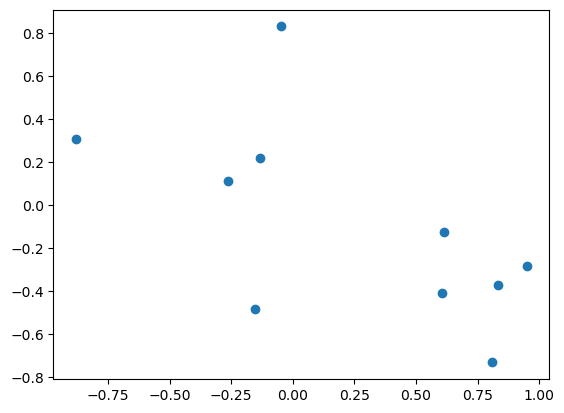

In [19]:

#Vi kan nu visualisere punkterne i et koordinatsystem:

def plot_points(points):
    x = [p[0] for p in points]
    y = [p[1] for p in points]
    plt.scatter(x,y)
    plt.show()
plot_points(points)



Vi kan nu generere to lister af punkter, som vi kan bruge til at træne vores KNN-algoritme på. Vi genererer 1000 punkter i hver liste:



In [20]:
points1 = generate_points(1000)
points2 = generate_points(1000)


Vi kan nu visualisere de to lister af punkter:


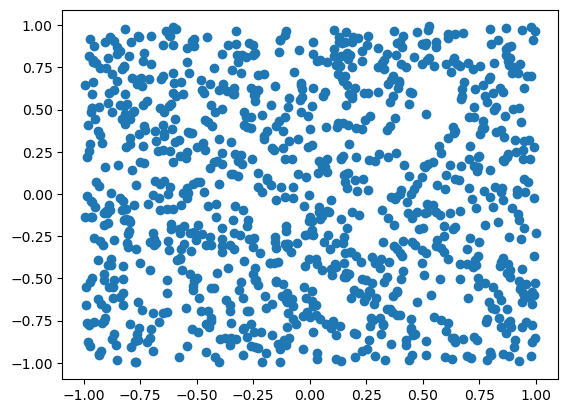

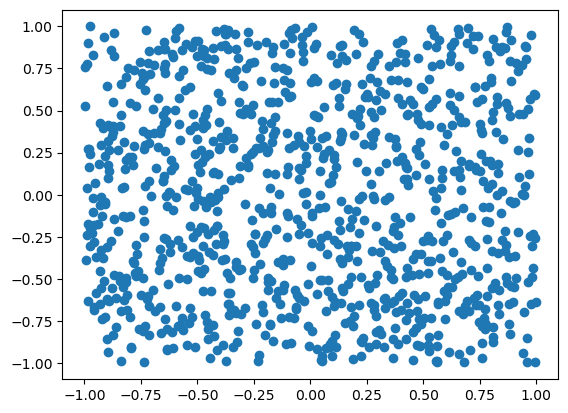

In [21]:
plot_points(points1)
plot_points(points2)




Vi kan nu definere en funktion til at beregne afstanden mellem to punkter:



In [22]:
def distance(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)



In [23]:
#Vi kan nu afprøve funktionen:
print(distance((0,0),(1,1)))


1.4142135623730951


In [ ]:

# Vi kan nu definere en funktion til at finde de k nærmeste naboer til et punkt:

def find_k_nearest_neighbors(p,points,k):
    distances = []
    for point in points:
        distances.append((distance(p,point),point))
    distances.sort()
    return distances[:k]




Her sørger sort for at sortere listen af tupler efter den første værdi i tuplen, som er afstanden. Vi kan nu afprøve funktionen:
```python
print(find_k_nearest_neighbors((0,0),points1,5))
```

Vi kan nu definere en funktion til at finde den hyppigste klasse blandt de k nærmeste naboer:
```python
def find_most_frequent_class(neighbors):
    classes = {}
    for neighbor in neighbors:
        if neighbor[1] in classes:
            classes[neighbor[1]] += 1
        else:
            classes[neighbor[1]] = 1
    return max(classes, key=classes.get)
```
I denne kode bruger vi en dictionary til at tælle antallet af forekomster af hver klasse. Vi bruger max til at finde den klasse, som optræder flest gange.

Vi kan nu afprøve funktionen:
```python
print(find_most_frequent_class(find_k_nearest_neighbors((0,0),points1,5)))
```

Så er vi endelig klar til at definere vores KNN-algoritme:
```python
def knn(p,points,k):
    neighbors = find_k_nearest_neighbors(p,points,k)
    return find_most_frequent_class(neighbors)
```

Vi kan nu afprøve funktionen:
```python
print(knn((0,0),points1,5))
```
eller
```python
print(knn((0,0),points2,5))
```

Vi bemærker, at vi undervejs har løst problemet ved at opdele det i mindre delproblemer, som vi har løst enkeltvis. Dette er en generel strategi, som vi vil bruge igen og igen.
Det ses bl.a. ved at vi har defineret funktioner for at løse delproblemerne. Det er en god ide at opdele problemer i mindre delproblemer, da det ofte gør det nemmere at løse dem.


## Implementation af K-NN ved brug af numpy, matplotlib og scipy
I denne notebook vil vi implementere K-NN algoritmen ved brug af numpy, matplotlib og scipy. Vi vil bruge en række af de funktioner som vi har introduceret tidligere. Vi vil også introducere en række nye funktioner.

Vi vil bruge følgende notation: 
- $X$ er en matrix med $n$ rækker og $m$ kolonner. 
- $x$ er en vektor med $m$ elementer. 
- $y$ er en vektor med $n$ elementer.
- $x_i$ er en vektor med $m$ elementer.
- $y_i$ er en skalar.
- $x_{ij}$ er en skalar.
- $y_{i}$ er en skalar.

Lad os først foretage de nødvendige importeringer:

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
```

Herunder en række hjælpefunktioner, som blot angiver nogle forskellige måder at beregne distancen mellem to vektorer på:

```python
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def cosine_distance(x1, x2):
    return 1 - np.dot(x1, x2) / (np.sqrt(np.dot(x1, x1)) * np.sqrt(np.dot(x2, x2)))

def hamming_distance(x1, x2):
    return np.sum(x1 != x2)

def minkowski_distance(x1, x2, p):
    return np.sum(np.abs(x1 - x2)**p)**(1/p)
```

Lad os nu formulere K-NN algoritmen:

```python
def knn(X_train, y_train, x_test, k, distance_metric):
    distances = []
    for i in range(len(X_train)):
        distances.append(distance_metric(X_train[i], x_test))
    distances = np.array(distances)
    k_nearest = np.argsort(distances)[:k]
    k_nearest_labels = y_train[k_nearest]
    return np.bincount(k_nearest_labels).argmax()
```
Her er distance_metric en funktion som tager to vektorer som input og returnerer en skalar, distances et array med afstande fra x_test til alle punkter i X_train, k_nearest et array med de k nærmeste punkter i X_train og k_nearest_labels et array med de tilhørende labels.

Lad os nu teste vores K-NN algoritme på Iris-datasættet:

```python
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
```

Vi vil nu opdele datasættet i et træningssæt og et testsæt:

```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
```

Vi vil nu teste vores K-NN algoritme på et enkelt punkt:

```python
x_test = X_test[0]
y_test = y_test[0]
knn(X_train, y_train, x_test, 5, euclidean_distance)
```

Vi vil nu teste vores K-NN algoritme på alle punkter i testsættet:

```python
y_pred = []
for i in range(len(X_test)):
    y_pred.append(knn(X_train, y_train, X_test[i], 5, euclidean_distance))
y_pred = np.array(y_pred)
```

Vi vil nu beregne nøjagtigheden af vores K-NN algoritme:

```python
np.sum(y_pred == y_test) / len(y_test)
```

Vi vil nu visualisere vores K-NN algoritme:

```python
plt.figure(figsize=(10, 10))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='rainbow')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow')
plt.show()
```

Vi vil nu visualisere vores K-NN algoritme med en contour plot:

```python
plt.figure(figsize=(10, 10))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='rainbow')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow')
plt.contourf(X_test[:, 0], X_test[:, 1], y_pred, alpha=0.2, cmap='rainbow')
plt.show()
```


## KNN i scikit-learn
Hvis man ikke orker at implementere den selv, er det muligt at bruge scikit-learn's implementering af KNN. Det er en del af deres supervised learning modul, som også indeholder en række andre algoritmer.

Herunder illustrerer vi hvorledes scikit-learn's KNN kan bruges til at klassificere iris-blomster. Vi starter med at importere de nødvendige biblioteker og indlæse data:


In [ ]:
# indlæs pakker
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target



Vi splitter data op i trænings- og testdata:



In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:

# Vi opretter en KNN-instans og træner den på træningsdata:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

#Vi kan nu bruge den til at forudsige klassen for testdata:

y_pred = knn.predict(X_test)

#Vi kan nu beregne hvor godt den klarer sig på testdata:

print(accuracy_score(y_test, y_pred))

# Vi kan også bruge den til at forudsige klassen for en ny blomst:

new_flower = np.array([[5.1, 3.5, 1.4, 0.2]])
print(knn.predict(new_flower))


0.9333333333333333
[0]


1 0.9666666666666667
3 0.9333333333333333
5 0.9333333333333333
7 0.9666666666666667
9 1.0
11 0.9666666666666667
13 1.0
15 1.0
17 1.0
19 1.0
21 1.0
23 0.9666666666666667
25 0.9333333333333333
27 0.9666666666666667
29 0.9666666666666667
31 0.9666666666666667
33 0.9333333333333333
35 0.9333333333333333
37 0.9333333333333333
39 0.9333333333333333
41 0.9333333333333333
43 0.9333333333333333
45 0.9333333333333333
47 0.9
49 0.9


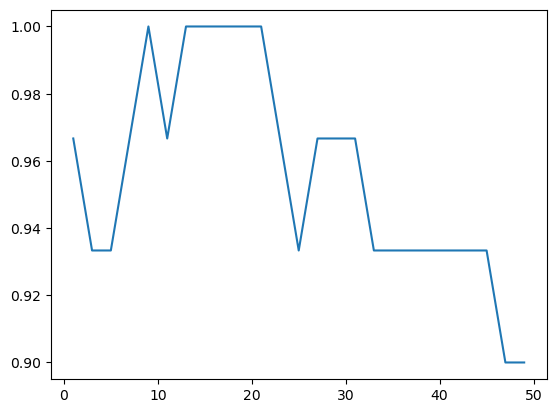

In [ ]:
# lad os teste med forskellige værdier af k:

for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(k,accuracy_score(y_test, y_pred))

# plot præcisionen som funktion af k:

accuracies = []
for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
plt.plot(range(1,50,2),accuracies)

# Nyt eksempel på brug af knn: Brystkræft
Vi vil nu se på et nyt eksempel på brug af KNN. Vi vil bruge KNN til at forudsige om en person har brystkræft eller ej. Vi vil bruge et datasæt fra scikit-learn, som indeholder data om brystkræft hos 569 personer. Vi starter med at importere de nødvendige biblioteker og indlæse data:



In [ ]:
# første gang vi bruger en pakke skal vi importere den sklearn breast cancer dataset:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# Vi kan se hvilke data der er i datasættet:
print(cancer.keys())

# Vi kan se hvilke features der er i datasættet:
print(cancer.feature_names)

# Vi kan se hvilke klasser der er i datasættet:
print(cancer.target_names)

# Vi kan se hvilke data der er i datasættet:
print(cancer.data)




dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650

0.9473684210526315
1 0.956140350877193
3 0.9473684210526315
5 0.956140350877193
7 0.956140350877193
9 0.9649122807017544
11 0.9649122807017544
13 0.9649122807017544
15 0.9649122807017544
17 0.9649122807017544
19 0.9649122807017544
21 0.9649122807017544
23 0.9649122807017544
25 0.9736842105263158
27 0.9649122807017544
29 0.9649122807017544
31 0.956140350877193
33 0.956140350877193
35 0.956140350877193
37 0.9649122807017544
39 0.9649122807017544
41 0.956140350877193
43 0.9649122807017544
45 0.9649122807017544
47 0.956140350877193
49 0.9649122807017544


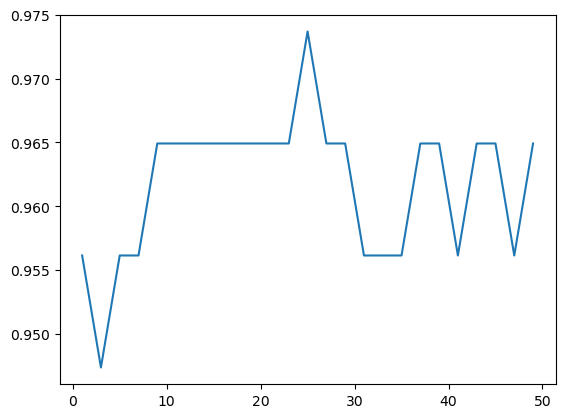

In [ ]:
# Lad os splitte datasættet i trænings- og testdata:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2)

# Vi opretter en KNN-instans og træner den på træningsdata:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

#Vi kan nu bruge den til at forudsige klassen for testdata:
y_pred = knn.predict(X_test)

#Vi kan nu beregne hvor godt den klarer sig på testdata:
print(accuracy_score(y_test, y_pred))

# Lad os plotte præcisionen som funktion af k:

accuracies = []
for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    print(k,accuracy_score(y_test, y_pred))
plt.plot(range(1,50,2),accuracies)

plt.show()


# KNN på MNIST

I det følgende vil vi bruge KNN til at klassificere tal fra MNIST-datasættet. Vi starter med at importere de nødvendige biblioteker og indlæse data:

In [ ]:
#Først indlæser vi pakkerne:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Vi indlæser datasættet:
digits = datasets.load_digits()

# Vi kan se hvilke data der er i datasættet:
print(digits.keys())

# Vi kan se hvilke features der er i datasættet:
print(digits.feature_names)

# Vi kan se hvilke klasser der er i datasættet:'
print(digits.target_names)



dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


0.9805555555555555
1 0.9805555555555555
3 0.9805555555555555
5 0.9805555555555555
7 0.9861111111111112
9 0.9805555555555555
11 0.9833333333333333
13 0.975
15 0.9777777777777777
17 0.9722222222222222
19 0.9638888888888889
21 0.9638888888888889
23 0.9611111111111111
25 0.9583333333333334
27 0.9555555555555556
29 0.9527777777777777
31 0.9527777777777777
33 0.9472222222222222
35 0.9472222222222222
37 0.9416666666666667
39 0.9416666666666667
41 0.9361111111111111
43 0.9361111111111111
45 0.9305555555555556
47 0.9361111111111111
49 0.9333333333333333


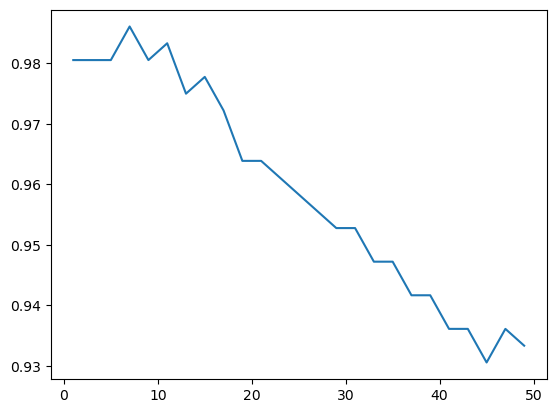

In [ ]:
# Lad os klargøre datasættet:

X = digits.data
y = digits.target

# Lad os splitte datasættet i trænings- og testdata:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Vi opretter en KNN-instans og træner den på træningsdata:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

#Vi kan nu bruge den til at forudsige klassen for testdata:
y_pred = knn.predict(X_test)

#Vi kan nu beregne hvor godt den klarer sig på testdata:
print(accuracy_score(y_test, y_pred))

# Lad os plotte præcisionen som funktion af k:

accuracies = []
for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    print(k,accuracy_score(y_test, y_pred))
plt.plot(range(1,50,2),accuracies)

plt.show()
